# Hyperparameter Tuning

In [1]:
import pandas as pd
import numpy as np

!gdown 19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
!gdown 1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
!gdown 1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
!gdown 12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG

Downloading...
From: https://drive.google.com/uc?id=19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
To: /content/preprocessed_X_sm.pickle
100% 534k/534k [00:00<00:00, 8.30MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
To: /content/X_test.pickle
100% 111k/111k [00:00<00:00, 5.58MB/s]
Downloading...
From: https://drive.google.com/uc?id=1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
To: /content/y_sm.pickle
100% 15.4k/15.4k [00:00<00:00, 37.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG
To: /content/y_test.pickle
100% 9.49k/9.49k [00:00<00:00, 22.5MB/s]


In [2]:
import pickle
# Load data (deserialize)
with open('preprocessed_X_sm.pickle', 'rb') as handle:
    X_train = pickle.load(handle)

with open('X_test.pickle', 'rb') as handle:
    X_test = pickle.load(handle)

with open('y_sm.pickle', 'rb') as handle:
    y_train = pickle.load(handle)

with open('y_test.pickle', 'rb') as handle:
    y_test = pickle.load(handle)

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_validate, cross_val_score

In [5]:
# Find best value for parameter max_depth

kfold = KFold(n_splits=10)

depths = [3,4,5,6,7,9,11,13,15]

for depth in depths:
    tree_clf = DecisionTreeClassifier(random_state=7, max_depth=depth)

    cv_acc_results = cross_validate(tree_clf, X_train, y_train, cv = kfold, scoring = 'f1', return_train_score = True)
    print(f"K-Fold for depth:{depth} Accuracy Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
    print(f"K-Fold for depth: {depth} Accuracy Std: Train: {cv_acc_results['train_score'].std()*100} Validation: {cv_acc_results['test_score'].std()*100}")
    print('***************')






K-Fold for depth:3 Accuracy Mean: Train: 79.05957241451492 Validation: 58.20248130951998
K-Fold for depth: 3 Accuracy Std: Train: 2.613801938568683 Validation: 29.93940671293915
***************
K-Fold for depth:4 Accuracy Mean: Train: 83.04520064810544 Validation: 59.45148462724676
K-Fold for depth: 4 Accuracy Std: Train: 2.1074314898090063 Validation: 28.287864704057203
***************
K-Fold for depth:5 Accuracy Mean: Train: 86.93193173711038 Validation: 58.72438100485653
K-Fold for depth: 5 Accuracy Std: Train: 2.0946793080780104 Validation: 29.99694071778251
***************
K-Fold for depth:6 Accuracy Mean: Train: 90.10550632443248 Validation: 62.76263939366895
K-Fold for depth: 6 Accuracy Std: Train: 1.9510179942109538 Validation: 28.061755034815555
***************
K-Fold for depth:7 Accuracy Mean: Train: 93.05464005673872 Validation: 64.50161392677322
K-Fold for depth: 7 Accuracy Std: Train: 1.4808535854663527 Validation: 26.971793419645905
***************
K-Fold for depth:9 Accu

In [9]:
tree_clf = DecisionTreeClassifier(random_state=7, max_depth=3)
tree_clf=tree_clf.fit(X_train, y_train)
pred = tree_clf.predict(X_test)

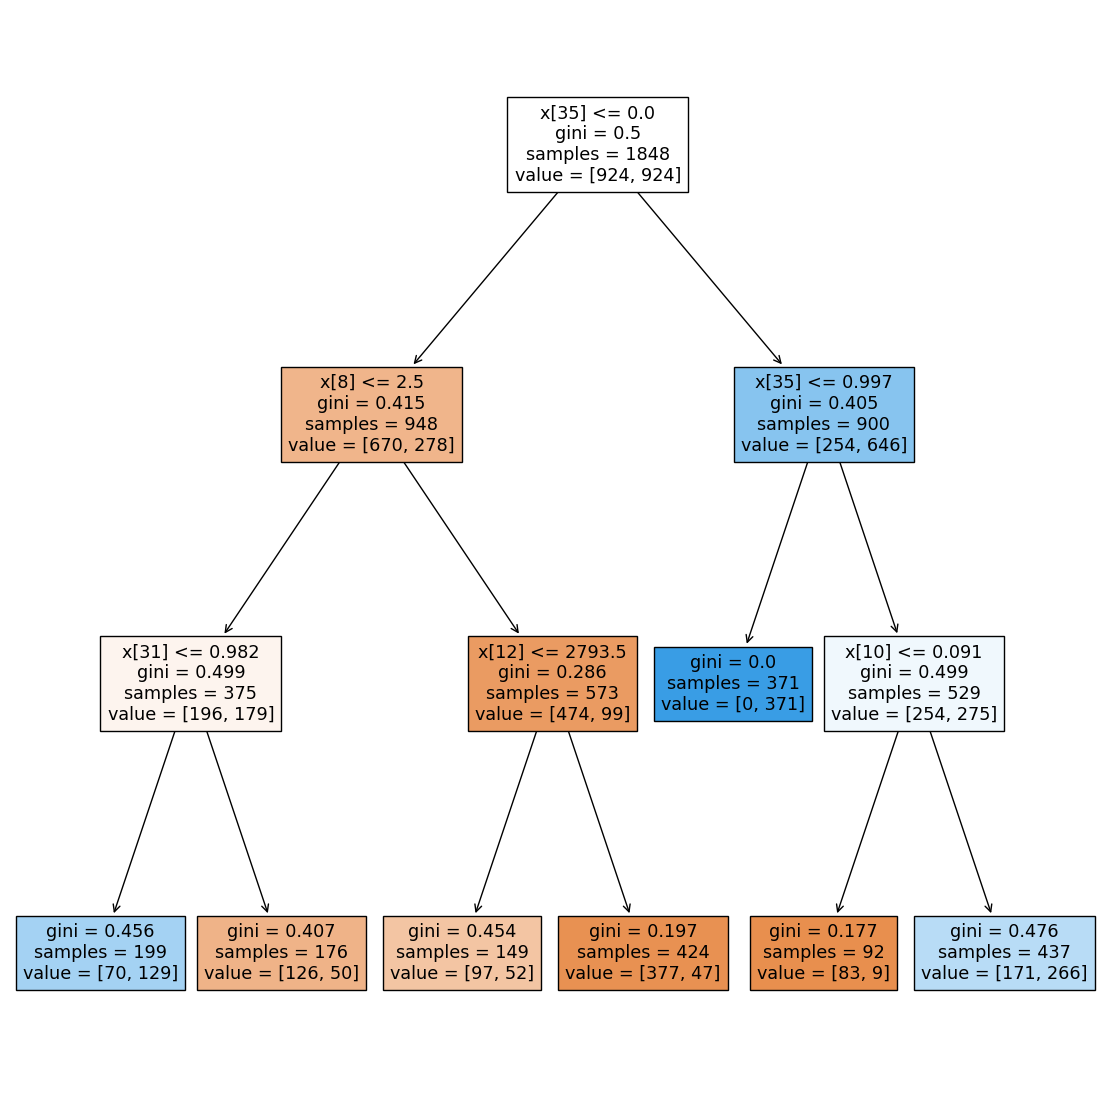

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(14,14))
plot_tree(tree_clf, filled = True);

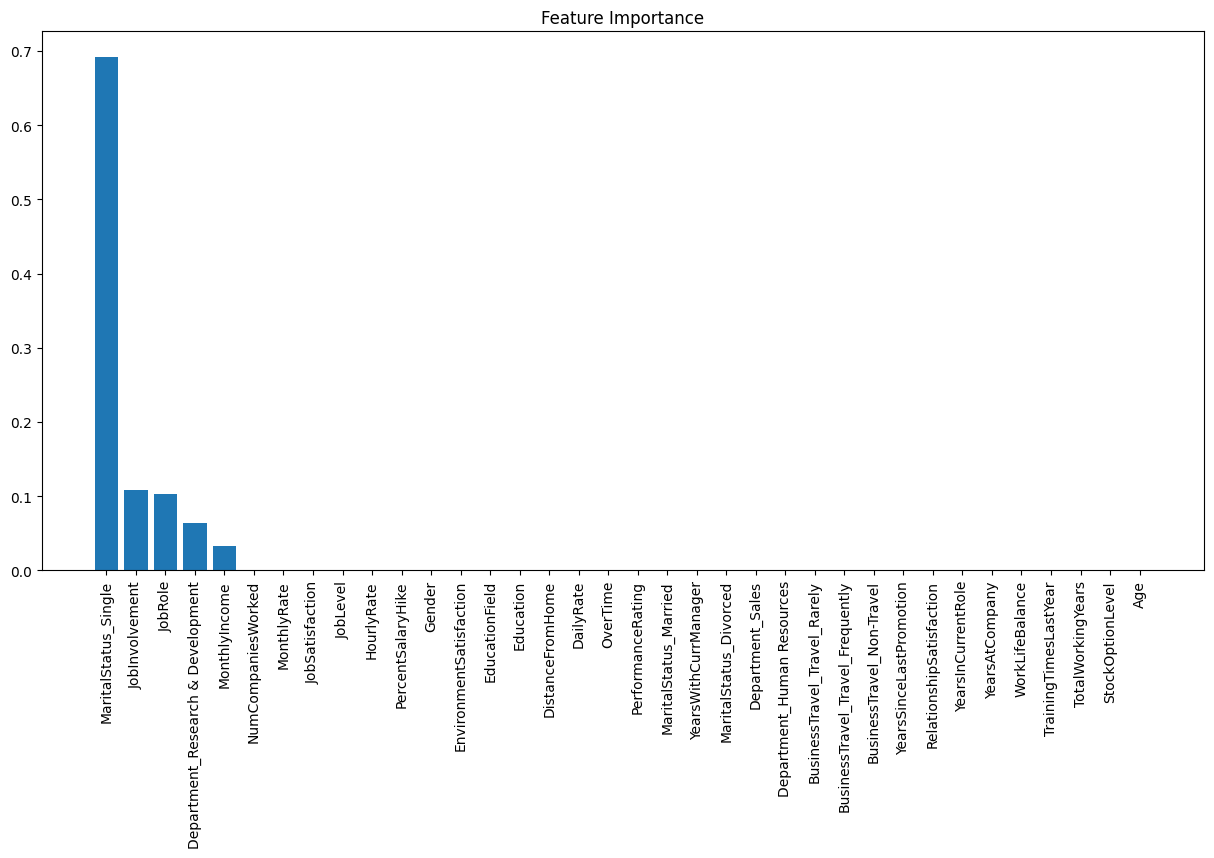

In [11]:
importances = tree_clf.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances

plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot


In [1]:
from IPython.display import IFrame

In [2]:
IFrame(src="https://www.desmos.com/calculator/yhcwubphxs", width=700, height=375)

# Decision Tree | Regression

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_validate
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [5]:
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=176WcJFfaSz3YkO1TiGEg_EqWgJ4YQEwO' -O "regData.csv"

--2024-04-27 09:50:46--  https://drive.google.com/uc?export=download&id=176WcJFfaSz3YkO1TiGEg_EqWgJ4YQEwO
Resolving drive.google.com... 142.250.187.206
Connecting to drive.google.com|142.250.187.206|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=176WcJFfaSz3YkO1TiGEg_EqWgJ4YQEwO&export=download [following]
--2024-04-27 09:50:47--  https://drive.usercontent.google.com/download?id=176WcJFfaSz3YkO1TiGEg_EqWgJ4YQEwO&export=download
Resolving drive.usercontent.google.com... 172.217.16.225
Connecting to drive.usercontent.google.com|172.217.16.225|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13355 (13K) [application/octet-stream]
Saving to: 'regData.csv'

regData.csv         100%[===================>]  13.04K  --.-KB/s    in 0s      

2024-04-27 09:50:47 (44.2 MB/s) - 'regData.csv' saved [13355/13355]



In [6]:
regression_data = pd.read_csv('regData.csv')

In [7]:
regression_data.head()

,X,Y
0,1,1.018138
1,2,0.813685
2,3,0.795484
3,4,0.860005
4,5,0.990648


In [8]:
regression_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       600 non-null    int64  
 1   Y       600 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 9.5 KB


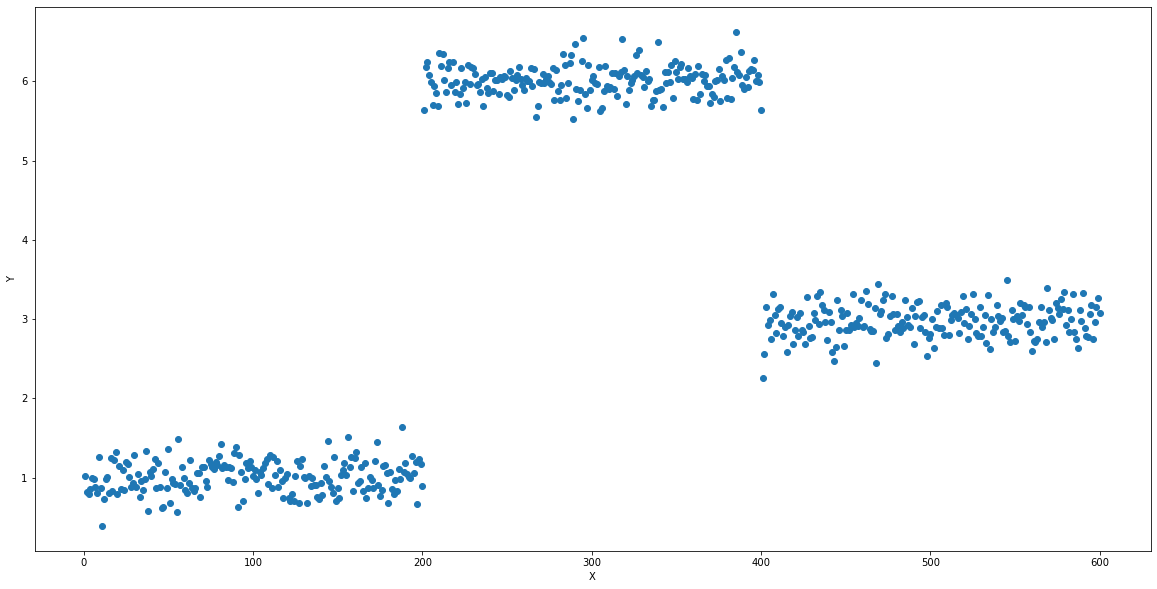

In [10]:
X = regression_data['X']
y = regression_data['Y']

plt.figure(figsize = (20,10))
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Here simple linear regression will fail to fit a line on this type of data.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=43,
                                                    shuffle = True)

In [13]:
X_train = X_train.values.reshape(-1,1)

In [15]:
y_train = y_train.values

In [17]:
depths = [1,2,3,5,6,7,9,11]

for depth in depths:
    tree_reg = DecisionTreeRegressor(random_state=7, max_depth = depth, min_samples_split = 10, min_samples_leaf = 20)

    kfold = KFold(n_splits=3)

    # scoring is taken as negative mse as we maximize the scoring. maximizing negative MSE is same as minimizing MSE.
    cv_acc_results = cross_validate(tree_reg, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error', return_train_score = True)

    print(f"K-Fold for depth:{depth} -ve MSE Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
    print('***************')

K-Fold for depth:1 -ve MSE Mean: Train: -157.29484407813618 Validation: -161.85220982964185
***************
K-Fold for depth:2 -ve MSE Mean: Train: -4.022779524301007 Validation: -13.41631105078697
***************
K-Fold for depth:3 -ve MSE Mean: Train: -3.889896491712604 Validation: -13.530023054703413
***************
K-Fold for depth:5 -ve MSE Mean: Train: -3.802910351858201 Validation: -13.515703625248829
***************
K-Fold for depth:6 -ve MSE Mean: Train: -3.802910351858201 Validation: -13.515703625248829
***************
K-Fold for depth:7 -ve MSE Mean: Train: -3.802910351858201 Validation: -13.515703625248829
***************
K-Fold for depth:9 -ve MSE Mean: Train: -3.802910351858201 Validation: -13.515703625248829
***************
K-Fold for depth:11 -ve MSE Mean: Train: -3.802910351858201 Validation: -13.515703625248829
***************


In [18]:
features = list(regression_data.columns[0])

In [19]:
tree_reg = DecisionTreeRegressor(random_state=7, max_depth = 2, min_samples_split = 20 )
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, min_samples_split=20, random_state=7)

In [46]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

In [47]:
dot_data = StringIO()
export_graphviz(tree_reg, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

AttributeError: type object 'pyparsing_unicode' has no attribute 'BasicMultilingualPlane'